Jacobian and Hessian are very useful tools for analyzing and understanding the optimization of networks.

# Basic intuition

The gradient is a rate of changing of loss function in a various directions. So how much loss function changes if you change the input by a very small amount.
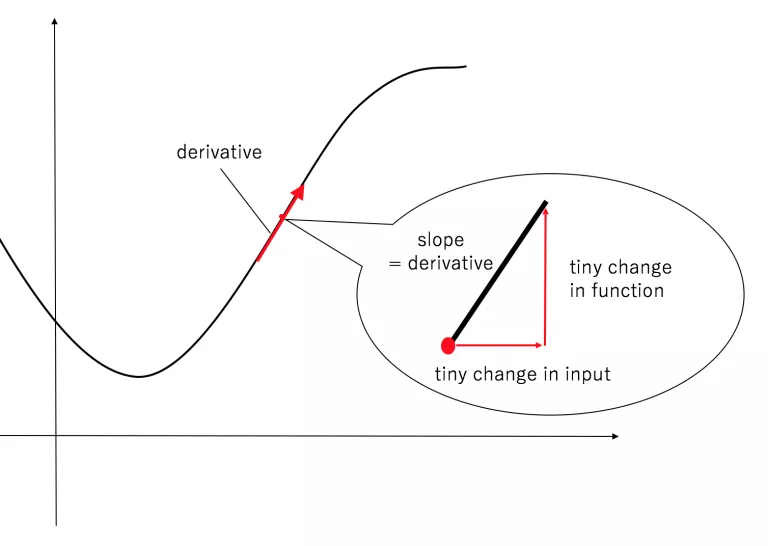
Above picture has only x-axis parameter(input) as a base case. However, there are lots of parameters, particulary below is the case of 2 parameters.

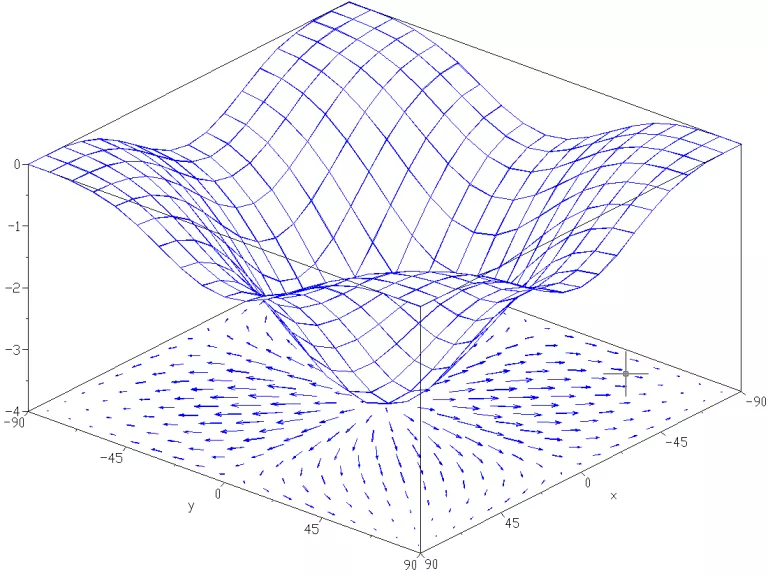

Arrows at the bottom correspong to gradients. Gradient is a vector of derivate of loss function for each direction or for each parameter($x_1, x_2, x_3, ...$), looks like this in mathematics

\begin{pmatrix}\frac{\partial L^{k}}{\partial x_1^{k}} \\  \frac{\partial L^{k}}{\partial x_2^{k}} \\ \frac{\partial L^{k}}{\partial x_3^{k}} \\ ...   \end{pmatrix}

Here k is degree of derivative. So each element is simply the slope of the function L in each direction.

If k = 2 we have second derivative, which mean the rate of change of slope of loss function L.
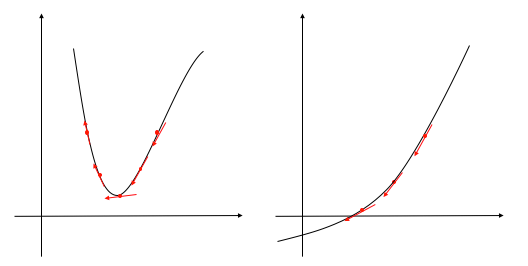

The red arrows are the derivative/ slope of function. As we can notice on the left image slope changes a lot, more than on the right image, where the change is stable(here I mean the direction of slope is stable). Second-order derivative of function correspond to Hessian matrix.
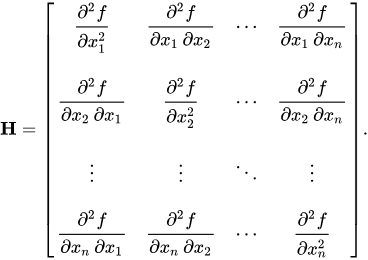

You can use Hessian to know the curvature of function, at each direction curvature is not the same. 

Now let's consider equation of quadratic form


Using matrices we can rewrite it as

A is a symmetric matrix, meaning $A = A^{T}$

First derivative respecting to $x$ is $$Ax - b$$ Second derivative or Hessian is $A$. Optimal solution is $x = A^{-1}b$.

Some quadratic forms of Hessian
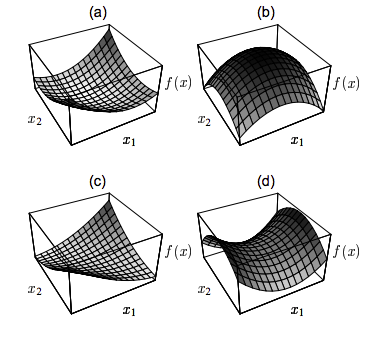

So how exactly curvature is determined by Hessian? Here eigenvalues and eigenvectors will help us.


$\nu $ is eigenvector, $\lambda$ is eigenvalue. Eigenvectors is vectors that don't change the direction after multiplied with M, eigenvalues represent the change in length of eigenvectors when they multiplied with M.

There are some useful properties:
* Each eigenvector represents a direction where the curvature is independent of the other directions
* The curvature in the direction of the eigenvector is determined by the eigenvalue. If the eigenvalue is larger, there is a larger curvature, and if it positive, the curvature will be positive, and vice-versa.

For the eigenvectors, the gradient only changes in the direction it points in. In other words, all the non-diagonal elements of the Hessian are 0 for the eigenvectors

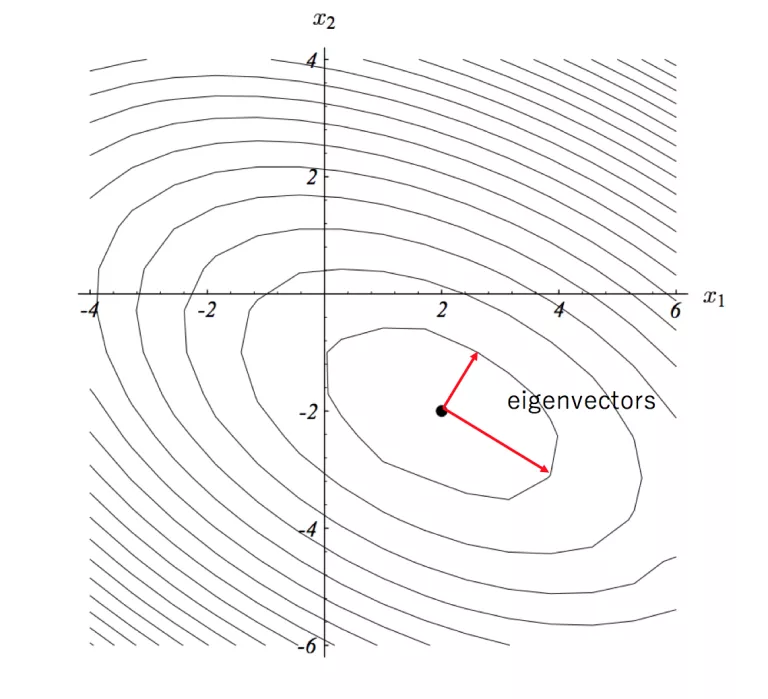

So at the image above eigenvectors are the axis of the elipses. larger eigenvalue = larger curvature = larger rate of change, so the axes in the direction of large eigenvalues are actually shorter.

Loss function (a) is curving upwards in two directions, so has two positive eigenvalues, whereas the eigenvalues are both negative for (b). (d) has one negative and one positive eigenvalue. (c) is a bit special: one of its eigenvalues is 0. This is why the loss is flat across one axis.

So if plot is curving upwards in one deriction eigenvalue is positive for that direction or eigenvector, if curving downwards then negative, if it is plateu then 0.

# Relation between Hessian and optimization

The larger the eigenvalue, the faster the convergence from the direction of its corresponding eigenvector.

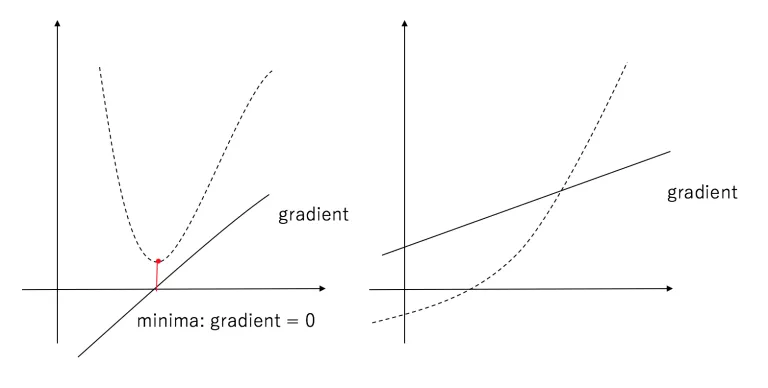

Left image corresponds to fast converge to minima, so eigenvalue is big but further moving which means potential big loss function. Right image shows slow converges to minima, so eigenvalue is small. 

This is the rate of convergence

Ideal is when x = 0, meaning minima, we can get it by using 
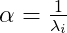

But what $\lambda_i$ to choose if they are not equal, so we bounded by the most large $\lambda_{max}$ and smallest $\lambda_{min}$. Idea is not to miss minima using big $\lambda$ and converge to minima by not using too much steps if it is possible.

# Connection with deep learning


We can use Taylor expansion to approximate our loss function 
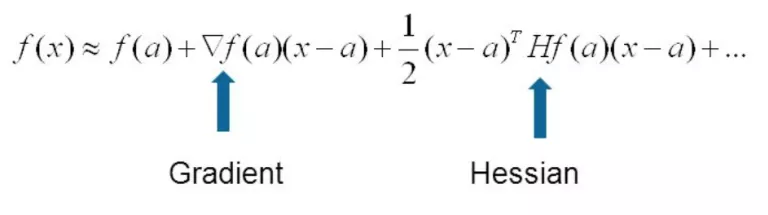

Large portion of the problems in deep learning can be attributed to ill-conditioning: some parameters have huge curvature while some have smaller curvature. 

It turns out that when the inputs are not normalized, the mean of the inputs often makes the largest eigenvalue of the Hessian even larger. Normalizing the inputs reduces the largest curvature, and makes the Hessian “better conditioned”.

Incidentally, this is similar to how batch normalization makes training easier.

Momentum

Instead of changing the Hessian itself, momentum is a way of reducing the step size in directions of larger curvature and increasing it in directions of smaller curvature. Intuitively, when the parameters go back and forth, the curvature is probably high, so momentum automatically reduces the learning rate for that directions.

# Conclusion

* Second-order derivatives represent the curvature
* The eigenvalues of the Hessian represents the curvature of the loss function is in the direction of the corresponding eigenvector. Stronger curves mean a faster change in the gradient.
* The eigenvalues also represent how fast the parameters converge from the direction of the corresponding eigenvector.
* Directions with large eigenvalues need smaller step-sizes because they converge much faster, and will diverge if the step-size is too large. Directions with smaller eigenvalues need larger step-sizes because otherwise, they converge far too slowly.

# More theory

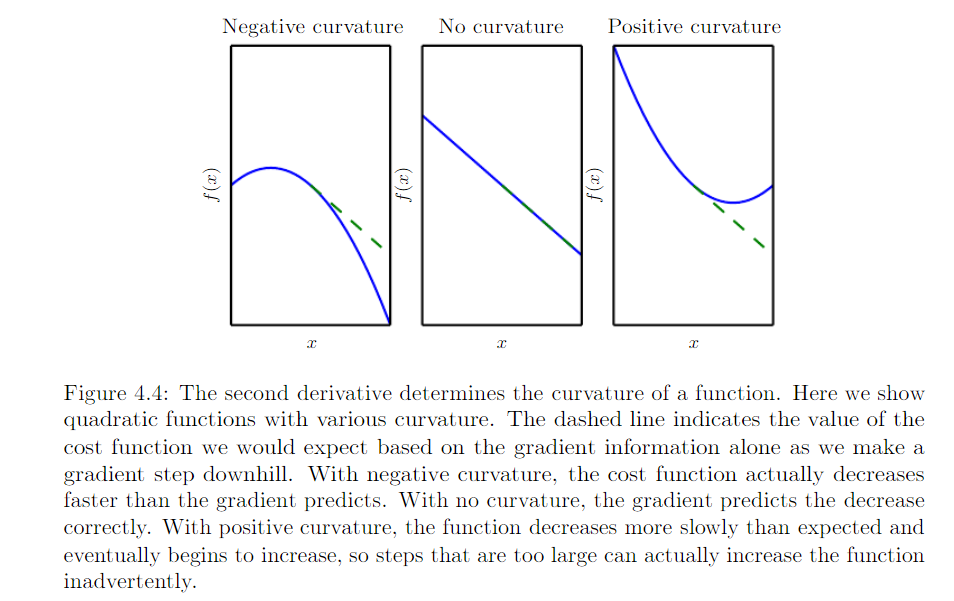

Hessian matrix is symmetric, so $$\frac{\partial^2{f}}{\partial{x_i}\partial{x_j}} = \frac{\partial^2{f}}{\partial{x_j}\partial{x_i}}$$

As Hessian is symmetric and real we can decompose it into a set of real eigenvalues and orthogonal basis of eigenvectors. The maximum eigenvalue determines the maximum second derivative, and the minimum eigenvalue determines the minimum second derivative. We can approximate function by Taylor series in the current point $x^0$
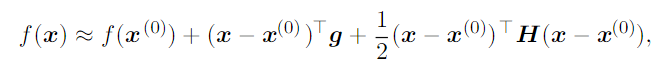

where g is gradient and H is Hessian at $x^0$. If our learning rate is $\epsilon$ then next step we got the point $x = x^0 - \epsilon g$

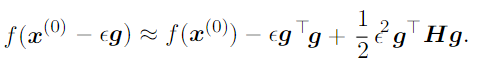

There are three terms here: the original value of the function, the expected improvement due to the slope of the function, and the correction we must applyto account for the curvature of the function.

Due to equation we can see that if last term is large then value of function can move uphill, in contrast if it equals 0 or negative, by increasing $\epsilon$ then we can decrease function f forever. 

The second derivative can be used to determine whether a critical point isa local maximum, a local minimum, or a saddle point. Recall that on a critical point, $f'(x) = 0$. When the second derivative $f"(x)>0$, the ﬁrst derivative $f'(x)$ increases as we move to the right and decreases as we move to the left. This means $f'(x − \epsilon)<0$ and $f'(x+\epsilon)>0$ for small enough $\epsilon$. In other words, as we move right, the slope begins to point uphill to the right, and as we move left, the slope begins to point uphill to the left. Thus, when $f'(x) = 0$ and $f"(x)>0$, we can conclude that $x$ is a local minimum. Similarly, when $f'(x) = 0$ and $f"(x)<0$, we can conclude that $x$ is a local maximum. In the case, when $f"(x) =0$ we can't conclude anything, $x$ can be saddle point or flat region.

At a critical point, where ∇f(x) = 0, we can examine the eigenvalues of the Hessian to determine whether the critical point is a local maximum, local minimum, or saddle point. When the Hessian is positive deﬁnite (all its eigenvalues are positive), the point is a local minimum. This can be seen by observing that the directional second derivativein any direction must be positive, and making reference to the univariate second derivative test. Likewise, when the Hessian is negative deﬁnite (all its eigenvalues are negative), the point is a local maximum. In multiple dimensions, it is actually possible to ﬁnd positive evidence of saddle points in some cases. When at least one eigenvalue is positive and at least one eigenvalue is negative, we know that $x$ is a local maximum on one cross section but a local minimum on another cross section. See ﬁgure 4.5 for an example. Finally, the multidimensional second derivative test can be inconclusive, just as the univariate version can. The testis inconclusive whenever all the nonzero eigenvalues have the same sign but at least one eigenvalue is zero. This is because the univariate second derivative test is inconclusive in the cross section corresponding to the zero eigenvalue.
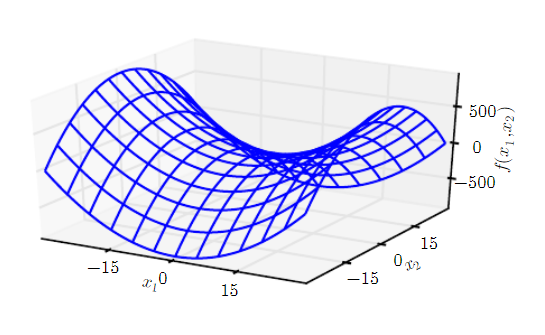

In multiple dimensions, there is a diﬀerent second derivative for each direction at a single point. The condition number of the Hessian at this point measures how much the second derivatives diﬀer from each other. When the Hessian has a poor condition number, gradient descent performs poorly. This is because in one direction, the derivative increases rapidly, while in another direction, it increases slowly. Gradient descent is unaware of this change in the derivative, so it does not know that it needs to explore preferentially in the direction where the derivative remains negative for longer. Poor condition number also makes choosing a good step size diﬃcult. The step size must be small enough to avoid overshooting the minimum and going uphill in directions with strong positive curvature. This usually means that the step size is too small to make signiﬁcant progress in other directions with less curvature.